# SCANPY - PAGA - Differential analysis

In [1]:
#conda activate scRNA
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from matplotlib import rcParams
import scanpy as sc
import os
import csv
from astropy.io import ascii
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.cluster import DBSCAN
import warnings
from matplotlib_venn import venn3
from pathlib import Path
import sys
from itertools import combinations
from importlib import reload

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

warnings.filterwarnings('ignore')
code_dir = os.getcwd()
code_dir
sc.logging.print_versions()

scanpy==1.5.1 anndata==0.7.4 umap==0.4.4 numpy==1.19.2 scipy==1.5.2 pandas==1.0.5 scikit-learn==0.23.2 statsmodels==0.11.1 python-igraph==0.8.2 louvain==0.6.1 leidenalg==0.8.1


In [2]:
code_dir = os.getcwd()
base_dir = code_dir.replace("/codes_local","")
parent_dir = "/".join(base_dir.split("/")[:-1])
tools_dir = parent_dir + "/tools"

sys.path.insert(1, tools_dir)
import sc_addons
reload(sc_addons)

sp_name = base_dir.split("/")[-1]
analysis_name = ["0", "resampled"]

wk_dir = base_dir + "/1_Scanpy/%s_Scanpy_out_%s"%(analysis_name[0],analysis_name[1])
Path(wk_dir).mkdir(parents=True, exist_ok=True)

print(sp_name, analysis_name)

0_Acute-Chronic ['0', 'resampled']


-----

### Info: Exp391 Expressional Level Differential Analysis
1. **Cluster v.s. Cluster** <br>
    1.1 One v.s. all <br>
    1.2 One v.s. one <br>
<br>
2. **Armstrong v.s. Clone13** <br>
    2.1 Armstrong v.s. Clone13 v.s. Naive in all cells <br>
    2.2 Armstrong v.s. Clone13 in each cluster <br>
    2.3 Armstrong v.s. Clone13 in each time point (day5, day8) <br>
    2.4 Conditions v.s. Condition (Armstrong / Clone13 / Naive each time point one v.s. one)

-----

## 0. Read object

In [9]:
#--- adata object
sp_h5ad = wk_dir + "/"+ sp_name + '_paga.h5ad'
adata = sc.read_h5ad(sp_h5ad)

# Convert all cell type labels to general labels "A" "C" "N"
adata.obs['cell_type_general'] = [x[0] for x in adata.obs['cell_type']]
adata.obs['day'] = [x[1] for x in adata.obs['cell_type']]
adata.obs['day'] = [x.replace('P', '0') for x in adata.obs['day']]

# Number of genes in adata object
gene_n = len(adata.raw.var)
gene_n

# Get set of labels
order_file = '/media/pipkin/ROCKET-PRO/CD8_DEV_SC/0_Acute-Chronic/2_scVelo/0_scVelo_out_resampledNoDyn/pt_ordered_cluster_avg.csv'
order_df = pd.read_csv(order_file)
louvain_new_ordered = order_df['louvain_new_label'].tolist()
louvain_old_ordered = order_df['louvain'].tolist()

adata.obs['louvain_newlabel'] = [ louvain_new_ordered[louvain_old_ordered.index(int(x))] for x in adata.obs['louvain'] ]
louvain_newlabel_uniq = list(set(adata.obs['louvain_newlabel']))
louvain_newlabel_uniq.sort()
louvain_newlabel_uniq

#--- All genes from features.tsv
feature_file = base_dir + '/0_cellranger_outs_XL_folder/outs/filtered_feature_bc_matrix/features.tsv'
features_df = pd.read_csv(feature_file, header=None, sep='\t')
all_genes = list(features_df[1])

In [12]:
adata.obs['P14_Tetramer'] = [x[-1] for x in adata.obs['cell_type']]

In [13]:
adata = adata[adata.obs["P14_Tetramer"] != "T"]

In [15]:
de_dir = wk_dir + '/2_DE'
Path(de_dir).mkdir(parents=True, exist_ok=True)

-----

<h1><font size="8"><center> 2. Arm v.s. Cl13 </center></font></h1>

# 2.1 Differential Analysis for Arm v.s. Cl13 v.s. NAV All Cluster

In [16]:
# Working directory
cp_dir = de_dir + '/Arm_vs_Cl13_P14only'
Path(cp_dir).mkdir(parents=True, exist_ok=True)

['A', 'C']


Trying to set attribute `.obs` of view, copying.
... storing 'day' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'cell_type_general' as categorical
Trying to set attribute `.obs` of view, copying.


A C wilcoxon


... storing 'louvain_newlabel' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'P14_Tetramer' as categorical


A C t-test
A C t-test_overestim_var


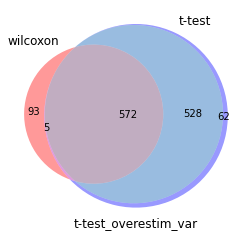

C A wilcoxon
C A t-test
C A t-test_overestim_var


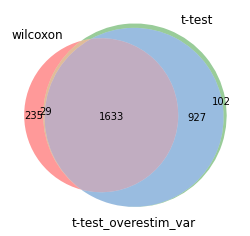

['A', 'N']


Trying to set attribute `.obs` of view, copying.
... storing 'day' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'cell_type_general' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'louvain_newlabel' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'P14_Tetramer' as categorical


A N wilcoxon
A N t-test
A N t-test_overestim_var


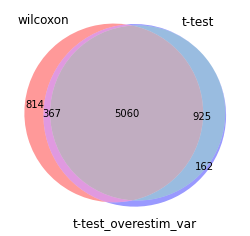

N A wilcoxon
N A t-test
N A t-test_overestim_var


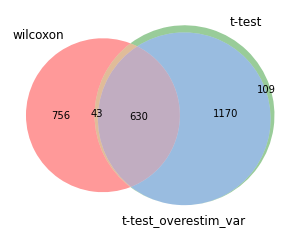

['A', 'C']


Trying to set attribute `.obs` of view, copying.
... storing 'day' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'cell_type_general' as categorical
Trying to set attribute `.obs` of view, copying.


A C wilcoxon


... storing 'louvain_newlabel' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'P14_Tetramer' as categorical


A C t-test
A C t-test_overestim_var


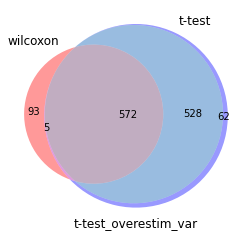

C A wilcoxon
C A t-test
C A t-test_overestim_var


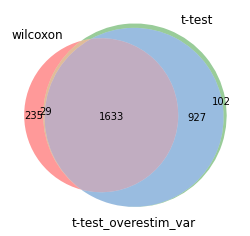

['C', 'N']


Trying to set attribute `.obs` of view, copying.
... storing 'day' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'cell_type_general' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'louvain_newlabel' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'P14_Tetramer' as categorical


C N wilcoxon
C N t-test
C N t-test_overestim_var


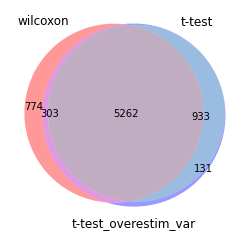

N C wilcoxon
N C t-test
N C t-test_overestim_var


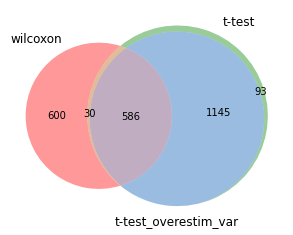

['A', 'N']


Trying to set attribute `.obs` of view, copying.
... storing 'day' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'cell_type_general' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'louvain_newlabel' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'P14_Tetramer' as categorical


A N wilcoxon
A N t-test
A N t-test_overestim_var


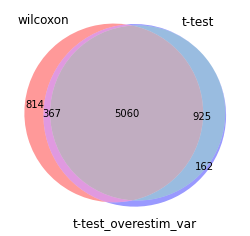

N A wilcoxon
N A t-test
N A t-test_overestim_var


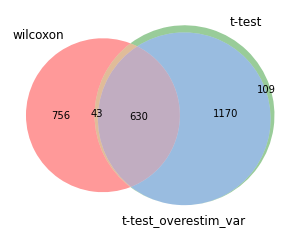

['C', 'N']


Trying to set attribute `.obs` of view, copying.
... storing 'day' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'cell_type_general' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'louvain_newlabel' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'P14_Tetramer' as categorical


C N wilcoxon
C N t-test
C N t-test_overestim_var


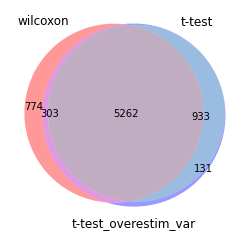

N C wilcoxon
N C t-test
N C t-test_overestim_var


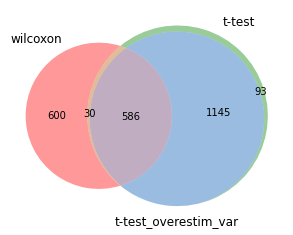

In [18]:
### Config
obs_useCol = 'cell_type_general'
cps = ['wilcoxon', 't-test', 't-test_overestim_var']

label_useCol = 'cell_type_general'
labels_uniq = list(set(adata.obs[label_useCol]))
labels_uniq.sort()

### Compare
for i in labels_uniq:
    for j in labels_uniq:
        if i != j:
            adata_ij = adata.copy()
            adata_ij = adata_ij[[True if x in [i,j] else False for x in adata_ij.obs[label_useCol].values],:]
            sc_addons.multitest_venn(adata_ij, cps, obs_useCol, cp_dir)

# 2.2 Differential Analysis for Arm v.s. Cl13 in each cluster

In [20]:
# Working directory
cp_dir = de_dir + '/perCluster_Arm_vs_Cl13_P14only'
Path(cp_dir).mkdir(parents=True, exist_ok=True)

['A', 'C']


Trying to set attribute `.obs` of view, copying.
... storing 'day' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'cell_type_general' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'louvain_newlabel' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'P14_Tetramer' as categorical


A C wilcoxon
A C t-test
A C t-test_overestim_var


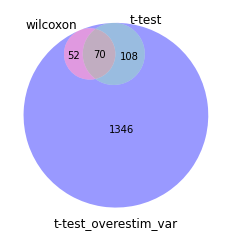

C A wilcoxon
C A t-test
C A t-test_overestim_var


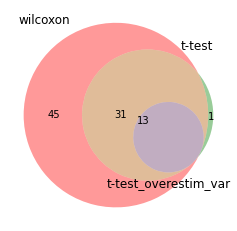

['A', 'C']


Trying to set attribute `.obs` of view, copying.
... storing 'day' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'cell_type_general' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'louvain_newlabel' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'P14_Tetramer' as categorical


A C wilcoxon
A C t-test
A C t-test_overestim_var


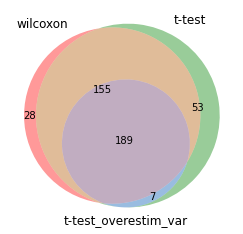

C A wilcoxon
C A t-test
C A t-test_overestim_var


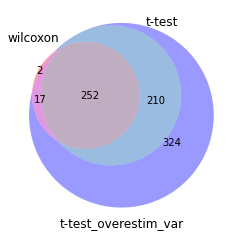

['A', 'C']


Trying to set attribute `.obs` of view, copying.
... storing 'day' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'cell_type_general' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'louvain_newlabel' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'P14_Tetramer' as categorical


A C wilcoxon
A C t-test
A C t-test_overestim_var


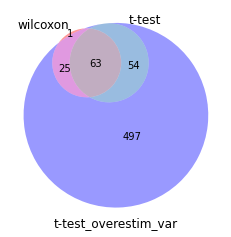

C A wilcoxon
C A t-test
C A t-test_overestim_var


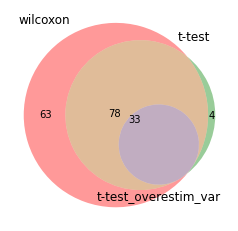

['A', 'C']


Trying to set attribute `.obs` of view, copying.
... storing 'day' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'cell_type_general' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'louvain_newlabel' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'P14_Tetramer' as categorical


A C wilcoxon
A C t-test
A C t-test_overestim_var


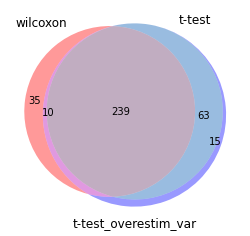

C A wilcoxon
C A t-test
C A t-test_overestim_var


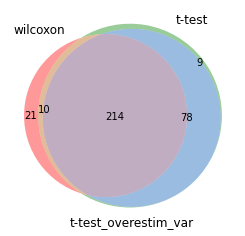

['A', 'C']


Trying to set attribute `.obs` of view, copying.
... storing 'day' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'cell_type_general' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'louvain_newlabel' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'P14_Tetramer' as categorical


A C wilcoxon
A C t-test
A C t-test_overestim_var


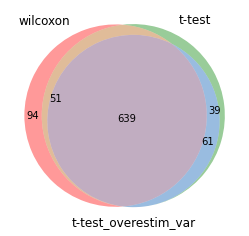

C A wilcoxon
C A t-test
C A t-test_overestim_var


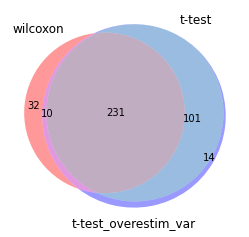

['A', 'C']


Trying to set attribute `.obs` of view, copying.
... storing 'day' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'cell_type_general' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'louvain_newlabel' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'P14_Tetramer' as categorical


A C wilcoxon
A C t-test
A C t-test_overestim_var


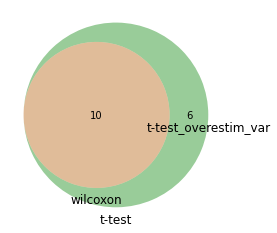

C A wilcoxon
C A t-test
C A t-test_overestim_var


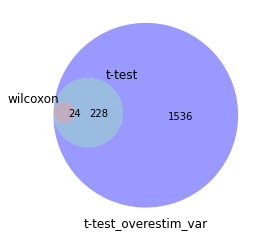

['A', 'C']


Trying to set attribute `.obs` of view, copying.
... storing 'day' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'cell_type_general' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'louvain_newlabel' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'P14_Tetramer' as categorical


A C wilcoxon
A C t-test
A C t-test_overestim_var


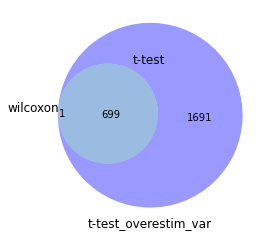

C A wilcoxon
C A t-test
C A t-test_overestim_var


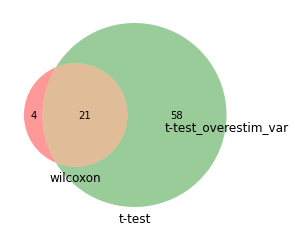

In [31]:
### Config
obs_useCol = 'cell_type_general'
cps = ['wilcoxon', 't-test', 't-test_overestim_var']
obs_useTypes = ['A', 'C']

louvain_unique = list(set(adata.obs['louvain_newlabel']))
louvain_unique.sort()
louvain_unique = [str(x) for x in louvain_unique]

### Compare
for i in louvain_unique:
    cp_dir_i = cp_dir + '/' + i
    Path(cp_dir_i).mkdir(parents=True, exist_ok=True)

    adata_i = adata.copy()
    adata_i = adata_i[[True if x==i else False for x in adata_i.obs['louvain_newlabel'].values], :]
    adata_i = adata_i[[True if x in obs_useTypes else False for x in adata_i.obs[obs_useCol].values], :]
    count_sum = adata_i.obs.reset_index()[['index',obs_useCol]].groupby(obs_useCol).count().T
    if (len(count_sum.columns) > 1) and (min(count_sum.iloc[0]) > 10):
        sc_addons.multitest_venn(adata_i, cps, obs_useCol, cp_dir_i)

# 2.3 Differential Analysis for Arm v.s. Cl13 in each time point

In [32]:
# Working directory
cp_dir = de_dir + '/perTimepoint_Arm_vs_Cl13_P14only'
Path(cp_dir).mkdir(parents=True, exist_ok=True)

['A', 'C']


Trying to set attribute `.obs` of view, copying.
... storing 'day' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'cell_type_general' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'louvain_newlabel' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'P14_Tetramer' as categorical


A C wilcoxon
A C t-test
A C t-test_overestim_var


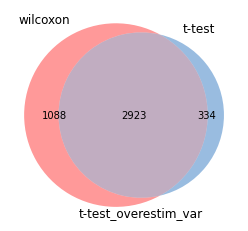

C A wilcoxon
C A t-test
C A t-test_overestim_var


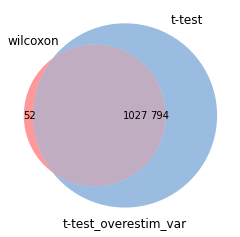

['A', 'C']


Trying to set attribute `.obs` of view, copying.
... storing 'day' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'cell_type_general' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'louvain_newlabel' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'P14_Tetramer' as categorical


A C wilcoxon
A C t-test
A C t-test_overestim_var


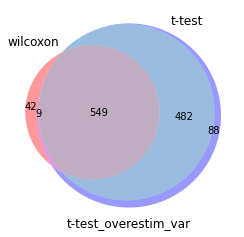

C A wilcoxon
C A t-test
C A t-test_overestim_var


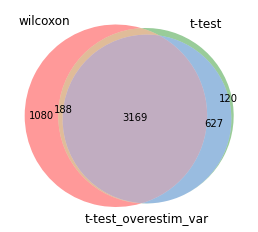

In [33]:
### Config
obs_useCol = 'cell_type_general'
cps = ['wilcoxon', 't-test', 't-test_overestim_var']
obs_useTypes = ['A', 'C']

day_use = ['5', '8']

### Compare
for i in day_use:
    cp_dir_i = cp_dir + '/' + "D" + i
    Path(cp_dir_i).mkdir(parents=True, exist_ok=True)
    
    adata_i = adata.copy()
    adata_i = adata_i[[True if x==i else False for x in adata_i.obs['day'].values], :]
    adata_i = adata_i[[True if x in obs_useTypes else False for x in adata_i.obs[obs_useCol].values], :]
    count_sum = adata_i.obs.reset_index()[['index',obs_useCol]].groupby(obs_useCol).count().T
    if (len(count_sum.columns) > 1) and (min(count_sum.iloc[0]) > 10):
        sc_addons.multitest_venn(adata_i, cps, obs_useCol, cp_dir_i)